#Medical Project
from Ricardo prototype


In [22]:
import pandas as pd
from pathlib import Path
import numpy as np
import nibabel as nib
from skimage import io
from google.colab import drive
import matplotlib.pyplot as plt

url = "https://github.com/jricardoct15/sep23_cds_int_medical_data/raw/main/MRI_Viz.py"
!wget --no-cache --backups=1 {url}
import MRI_Viz
!rm MRI_Viz.py

--2024-01-18 11:21:06--  https://github.com/jricardoct15/sep23_cds_int_medical_data/raw/main/MRI_Viz.py
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jricardoct15/sep23_cds_int_medical_data/main/MRI_Viz.py [following]
--2024-01-18 11:21:06--  https://raw.githubusercontent.com/jricardoct15/sep23_cds_int_medical_data/main/MRI_Viz.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2529 (2.5K) [text/plain]
Failed to rename MRI_Viz.py to MRI_Viz.py.1: (2) No such file or directory
Saving to: ‘MRI_Viz.py’

MRI_Viz.py          100%[===================>]   2.47K  --.-KB/s    in 0s      

2024-01-18 11

##Import Data
###Target variable
* hCon - hospital consultation
* ADHD - Attention deficit hyperactivity disorder

In [23]:
urlTrain_sexAge = "https://github.com/jricardoct15/sep23_cds_int_medical_data/raw/main/Train_sexAge.csv"
dfTrain_sexAge = pd.read_csv(urlTrain_sexAge)

In [24]:
dfTrain_sexAge.info()
dfTrain_sexAge['Age'].min()
dfTrain_sexAge['Age'].max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      147 non-null    object 
 1   target  147 non-null    object 
 2   Sex     147 non-null    int64  
 3   Age     147 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.7+ KB


17.6

### Import the nii.gz files
nifti images

In [25]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
def OpenNiftiGitHubFile (PathAndFileName,UserName= "jricardoct15",GithubRepo="sep23_cds_int_medical_data"):
  ''' Open nifti files from git hub
  User - github user name
  PathAndFileName - includs path/filename.nii.gz
  GithubRepo - Github Repository
  '''
  url = f"https://github.com/{UserName}/{GithubRepo}/raw/main/{PathAndFileName}"
  !wget --no-cache --backups=1 {url}

  data = nib.load(PathAndFileName).get_fdata()

  !rm {PathAndFileName}
  return data

In [28]:
#fileName = "areg_ADHD_1003_brain.nii.gz"
fileName = input('Enter your nifti fileName:')
img1 = OpenNiftiGitHubFile (fileName)

Enter your nifti fileName:areg_ADHD_1003_brain.nii.gz
--2024-01-18 11:24:43--  https://github.com/jricardoct15/sep23_cds_int_medical_data/raw/main/areg_ADHD_1003_brain.nii.gz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jricardoct15/sep23_cds_int_medical_data/main/areg_ADHD_1003_brain.nii.gz [following]
--2024-01-18 11:24:43--  https://raw.githubusercontent.com/jricardoct15/sep23_cds_int_medical_data/main/areg_ADHD_1003_brain.nii.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 984951 (962K) [application/octet-stream]
Failed to rename areg_ADHD_1003_brain.nii.gz to areg_ADHD_1003_brain.nii.

In [ ]:
# https://nipy.org/nibabel/gettingstarted.html
print("Image Shape: ",img1.shape)
print("Data type: ",type(img1))

Image Shape:  (91, 109, 91)
Data type:  <class 'numpy.ndarray'>


In [ ]:
dir(img1)

View Image

In [ ]:
def PlotNiftiXYZ(Image,X,Y,Z):
  '''
  Image - 3D Gray image in a 3D Array
  X - Left .. Right
  Y - Rear .. Front
  Z - Down .. Up
  '''
  maxX,maxY,maxZ = img1.shape

  axz=plt.subplot(2,2,1)
  axz.set_title('Z='+str(Z))
  plt.imshow(Image[:,:,Z], cmap = 'gray')
  plt.plot([0,5],[X,X],color='r')
  plt.plot([Y,Y],[maxX-5-1,maxX-1],color='y')
  #plt.xticks([])
  #plt.yticks([])
  plt.xlabel('Y')
  plt.ylabel('X')
  plt.gcf().set_size_inches(8,8)

  axy=plt.subplot(2,2,2)
  axy.set_title('Y='+str(Y))
  plt.imshow(Image[:,Y,:], cmap = 'gray')
  plt.plot([0,5],[X,X],color='r')
  plt.plot([Z,Z],[maxX-5-1,maxX-1],color='g')
  #plt.xticks([])
  #plt.yticks([])
  plt.xlabel('Z')
  plt.ylabel('X')
  plt.gcf().set_size_inches(8,8)

  axx=plt.subplot(2,2,3)
  axx.set_title('X='+str(X))
  plt.imshow(Image[X,:,:], cmap = 'gray')
  plt.plot([0,5],[Y,Y],color='y')
  plt.plot([Z,Z],[maxY-5-1,maxY-1],color='g')
  #plt.xticks([])
  #plt.yticks([])
  plt.xlabel('Z')
  plt.ylabel('Y')
  plt.gcf().set_size_inches(8,8)
  #plt.legend()
  plt.show()

Image orientation

*   X - Left .. Right
*   Y - Rear .. Front
*   Z - Down .. Up

In [29]:
MRI_Viz.PlotNiftiXYZ(img1,20,30,40)

NameError: name 'img1' is not defined

In [ ]:
def PlotNifti25(Image,Axis,Start):
  '''
  Print 25 cuts in an axis
  Image - 3D Gray image in a 3D Array
  Axis X, Y or Z
  Start - Start cut number
  '''
  maxX,maxY,maxZ = img1.shape
  if Axis == "x" or Axis=="X":
    if Start+25 < maxX:
      Xmax = Start + 25
    else:
      Xmax=maxX
    for i in range(Start, Xmax):
      ax=plt.subplot(5,5,i+1-Start)
      ax.set_title('X='+str(i))
      plt.imshow(Image[i,:,:], cmap = 'gray')
      plt.gcf().set_size_inches(15,15)
      plt.xticks([])
      plt.yticks([])
    plt.show()
  elif Axis == "y" or Axis=="Y":
    if Start+25 < maxY:
      Ymax = Start + 25
    else:
      Ymax=maxY
    for i in range(Start,Ymax):
      ay=plt.subplot(5,5,i+1-Start)
      ay.set_title('Y='+str(i))
      plt.imshow(Image[:,i,:], cmap = 'gray')
      plt.gcf().set_size_inches(15,15)
      plt.xticks([])
      plt.yticks([])
    plt.show()
  elif Axis == "z" or Axis=="Z":
    if Start+25 < maxZ:
      Zmax = Start + 25
    else:
      Zmax=maxZ
    for i in range(Start,Zmax):
      az=plt.subplot(5,5,i+1-Start)
      az.set_title('Z='+str(i))
      plt.imshow(Image[:,:,i], cmap = 'gray')
      plt.gcf().set_size_inches(15,15)
      plt.xticks([])
      plt.yticks([])
    plt.show()
  else:
    print('Axis must be X,Y or Z')

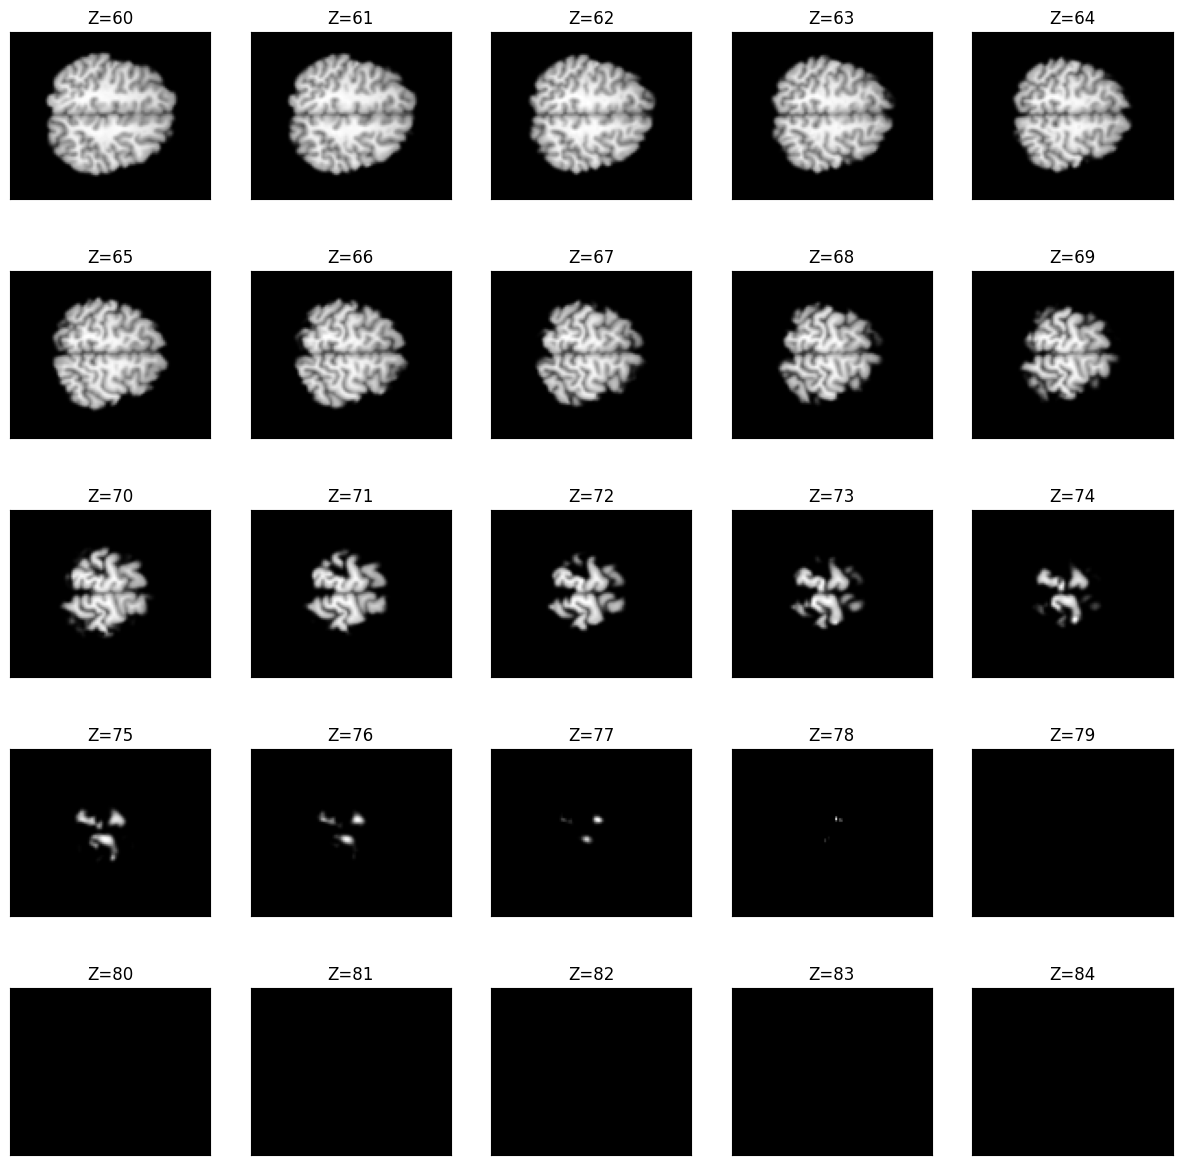

In [ ]:
MRI_Viz.PlotNifti25(img1,"Z",60)